#  Pandas
* Filtering
* Sorting
* Useful methods
* Group by 
* Merge


In [50]:
import pandas as pd
import pandera as pa

# Define the schema for data validation
schema = pa.DataFrameSchema({
    'Rollno': pa.Column(pa.Int, required=True),
    'Name': pa.Column(pa.String, required=True),
    'Father': pa.Column(pa.String, required=True),
    'Date of Admission': pa.Column(pa.DateTime, required=True),
    'Fee': pa.Column(pa.Int, required=True),
    'Course': pa.Column(pa.String, required=True)
})

# Corrected static data with repeated courses
data = {
    'Rollno': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Muhammad', 'Aisha', 'Ibrahim', 'Fatima', 'Ali', 'Zainab', 'Omar', 'Safiya', 'Hassan', 'Zahra'],
    'Father': ['Ahmad', 'Abdullah', 'Yusuf', 'Mustafa', 'Hussein', 'Khalid', 'Ismail', 'Rashid', 'Sadiq', 'Abdul'],
    'Date of Admission': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'Fee': [1000, 1200, 1500, 800, 2000, 1000, 1300, 1100, 1400, 900],
    'Course': ['Math', 'Physics', 'Chemistry', 'Biology', 'History', 'English', 'Computer Science', 'Economics', 'Geography', 'Art']
}

# Create a DataFrame and parse the date column
students_df = pd.DataFrame(data)
students_df['Date of Admission'] = pd.to_datetime(students_df['Date of Admission'])

# Validate the DataFrame against the schema and save in 'valid' variable
valid = schema.validate(students_df)
display(valid)


,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
3,4,Fatima,Mustafa,2023-01-04,800,Biology
4,5,Ali,Hussein,2023-01-05,2000,History
5,6,Zainab,Khalid,2023-01-06,1000,English
6,7,Omar,Ismail,2023-01-07,1300,Computer Science
7,8,Safiya,Rashid,2023-01-08,1100,Economics
8,9,Hassan,Sadiq,2023-01-09,1400,Geography
9,10,Zahra,Abdul,2023-01-10,900,Art


# Apply filter or filter functions on dataframe

In [51]:
students_df.head()

,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
3,4,Fatima,Mustafa,2023-01-04,800,Biology
4,5,Ali,Hussein,2023-01-05,2000,History


In [52]:
students_df.Course.value_counts()

Course
Math                1
Physics             1
Chemistry           1
Biology             1
History             1
English             1
Computer Science    1
Economics           1
Geography           1
Art                 1
Name: count, dtype: int64

* Using normalize to check percentage
* Using dropna to count none as well

In [53]:
students_df.Course.value_counts(dropna=False,normalize=True)*100

Course
Math                10.0
Physics             10.0
Chemistry           10.0
Biology             10.0
History             10.0
English             10.0
Computer Science    10.0
Economics           10.0
Geography           10.0
Art                 10.0
Name: proportion, dtype: float64

In [54]:
valid

,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
3,4,Fatima,Mustafa,2023-01-04,800,Biology
4,5,Ali,Hussein,2023-01-05,2000,History
5,6,Zainab,Khalid,2023-01-06,1000,English
6,7,Omar,Ismail,2023-01-07,1300,Computer Science
7,8,Safiya,Rashid,2023-01-08,1100,Economics
8,9,Hassan,Sadiq,2023-01-09,1400,Geography
9,10,Zahra,Abdul,2023-01-10,900,Art


In [55]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Set seed for reproducibility
random.seed(123)

# Define the number of transactions
num_transactions = 10000

# Generate random dates within a specific range
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_transactions)]

# Generate random fees within a specific range
min_fee = 1000
max_fee = 5000
fee_amounts = [random.randint(min_fee, max_fee) for _ in range(num_transactions)]

# Create a DataFrame for fee transactions
fee_data = {
    'Date': date_range,
    'Amount': fee_amounts
}

fee_df = pd.DataFrame(fee_data)

# Display the fee transaction data
display(fee_df)


,Date,Amount
0,2023-01-27,3641
1,2023-05-18,1837
2,2023-02-14,4984
3,2023-07-28,1374
4,2023-05-17,2987
...,...,...
9995,2023-07-05,1244
9996,2023-12-26,3758
9997,2023-12-19,4049
9998,2023-10-04,1661


Getting if else functionality with ranges with pd.cut

In [56]:
pd.cut(fee_df.Amount, [0,500, 1000,1500, 2000,2500, 3000,3500, 4000,4500, 5000]).value_counts()

Amount
(2500, 3000]    1296
(4500, 5000]    1292
(1500, 2000]    1291
(2000, 2500]    1285
(1000, 1500]    1264
(3000, 3500]    1209
(3500, 4000]    1192
(4000, 4500]    1171
(0, 500]           0
(500, 1000]        0
Name: count, dtype: int64

In [57]:
pd.cut(fee_df.Amount, [0,500, 1000,1500, 2000,2500, 3000,3500, 4000,4500, 5000]).value_counts(normalize=True)*100

Amount
(2500, 3000]    12.96
(4500, 5000]    12.92
(1500, 2000]    12.91
(2000, 2500]    12.85
(1000, 1500]    12.64
(3000, 3500]    12.09
(3500, 4000]    11.92
(4000, 4500]    11.71
(0, 500]         0.00
(500, 1000]      0.00
Name: proportion, dtype: float64

In [58]:
pd.qcut(fee_df.Amount,[0.3,0.5,0.7,0.9,1]).value_counts(normalize=True)*100

Amount
(2180.999, 2950.0]    28.644866
(2950.0, 3786.0]      28.559189
(3786.0, 4626.0]      28.544909
(4626.0, 5000.0]      14.251035
Name: proportion, dtype: float64

# Filter on Columns
* & | ~
Syntax:
```
dataframe[[dataframe.column == 'value] & [dataframe.column2 == 'value2]]
```

In [59]:
students_df.head()

,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
3,4,Fatima,Mustafa,2023-01-04,800,Biology
4,5,Ali,Hussein,2023-01-05,2000,History


In [60]:
students_df[students_df['Course'] == 'Physics' ]

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics


In [61]:
students_df[students_df['Course'].str.lower()== "physics"]

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics


In [62]:
students_df[students_df['Course'].str.lower().str.contains('cs')]

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
7,8,Safiya,Rashid,2023-01-08,1100,Economics


In [63]:
students_df[(students_df['Course'].str.lower().str.contains('cs')) & (students_df['Fee']>150)]

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
7,8,Safiya,Rashid,2023-01-08,1100,Economics


In [64]:
students_df[(students_df['Course'].str.lower().str.contains('c')) & (students_df['Course'].str.lower().str.contains('s'))]

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
6,7,Omar,Ismail,2023-01-07,1300,Computer Science
7,8,Safiya,Rashid,2023-01-08,1100,Economics


# Apply filters on date columns
* dataframe.column.dt
* dt.strftime
* dt.strptime




In [65]:
[i for i in dir(students_df['Date of Admission'].dt) if '__' not in i]

['_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'as_unit',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'unit',
 'weekday',
 'year']

In [66]:
students_df['Date of Admission'].dt.weekday
students_df['Date of Admission'].dt.month
students_df['Date of Admission'].dt.year


0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: Date of Admission, dtype: int32

In [67]:
from datetime import datetime as dt
date : datetime = dt.now()
date

datetime.datetime(2023, 11, 9, 22, 41, 0, 469334)

In [68]:
import pandas as pd

# Generate hourly datetimes
date_range = pd.date_range(start='2023-01-01', end='2023-01-02', freq='H')

d1 : pd.Series = pd.Series(date_range)

In [69]:
s1 : pd.Series = pd.Series([date])
s1

0   2023-11-09 22:41:00.469334
dtype: datetime64[ns]

In [70]:
s1.dt.strftime("%Y-%m-%d %H:%M:%S") # converts from date to string

0    2023-11-09 22:41:00
dtype: object

In [71]:
d1.dt.strftime("%Y-%m-%d %H:%M:%S")

0     2023-01-01 00:00:00
1     2023-01-01 01:00:00
2     2023-01-01 02:00:00
3     2023-01-01 03:00:00
4     2023-01-01 04:00:00
5     2023-01-01 05:00:00
6     2023-01-01 06:00:00
7     2023-01-01 07:00:00
8     2023-01-01 08:00:00
9     2023-01-01 09:00:00
10    2023-01-01 10:00:00
11    2023-01-01 11:00:00
12    2023-01-01 12:00:00
13    2023-01-01 13:00:00
14    2023-01-01 14:00:00
15    2023-01-01 15:00:00
16    2023-01-01 16:00:00
17    2023-01-01 17:00:00
18    2023-01-01 18:00:00
19    2023-01-01 19:00:00
20    2023-01-01 20:00:00
21    2023-01-01 21:00:00
22    2023-01-01 22:00:00
23    2023-01-01 23:00:00
24    2023-01-02 00:00:00
dtype: object

In [72]:
s2 : pd.Series = pd.Series(['01 November 2023','01 January 2012','04 February 2012','01 March 2012'])
s2

0    01 November 2023
1     01 January 2012
2    04 February 2012
3       01 March 2012
dtype: object

In [73]:
s2.apply(lambda x: dt.strptime(x, '%d %B %Y')) # converts from string to date

0   2023-11-01
1   2012-01-01
2   2012-02-04
3   2012-03-01
dtype: datetime64[ns]

# Group by
* dataframe.groupby(['col 1', 'col 2', 'col 3])
* dataframe.groupby(['col 1', 'col 2', 'col 3]).aggregate([min,max])
* dataframe.groupby(['col 1', 'col 2', 'col 3']).apply(function())

In [74]:
students_df

,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math
1,2,Aisha,Abdullah,2023-01-02,1200,Physics
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
3,4,Fatima,Mustafa,2023-01-04,800,Biology
4,5,Ali,Hussein,2023-01-05,2000,History
5,6,Zainab,Khalid,2023-01-06,1000,English
6,7,Omar,Ismail,2023-01-07,1300,Computer Science
7,8,Safiya,Rashid,2023-01-08,1100,Economics
8,9,Hassan,Sadiq,2023-01-09,1400,Geography
9,10,Zahra,Abdul,2023-01-10,900,Art


In [75]:
list(students_df.groupby(['Course']))

[(('Art',),
     Rollno   Name Father Date of Admission  Fee Course
  9      10  Zahra  Abdul        2023-01-10  900    Art),
 (('Biology',),
     Rollno    Name   Father Date of Admission  Fee   Course
  3       4  Fatima  Mustafa        2023-01-04  800  Biology),
 (('Chemistry',),
     Rollno     Name Father Date of Admission   Fee     Course
  2       3  Ibrahim  Yusuf        2023-01-03  1500  Chemistry),
 (('Computer Science',),
     Rollno  Name  Father Date of Admission   Fee            Course
  6       7  Omar  Ismail        2023-01-07  1300  Computer Science),
 (('Economics',),
     Rollno    Name  Father Date of Admission   Fee     Course
  7       8  Safiya  Rashid        2023-01-08  1100  Economics),
 (('English',),
     Rollno    Name  Father Date of Admission   Fee   Course
  5       6  Zainab  Khalid        2023-01-06  1000  English),
 (('Geography',),
     Rollno    Name Father Date of Admission   Fee     Course
  8       9  Hassan  Sadiq        2023-01-09  1400  Geograp

In [76]:
list(students_df.groupby(['Course']))[0]

(('Art',),
    Rollno   Name Father Date of Admission  Fee Course
 9      10  Zahra  Abdul        2023-01-10  900    Art)

In [77]:
for group in list(students_df.groupby(['Course'])):
    display(group[0])
    display(group[1])
    display("==========")

('Art',)

,Rollno,Name,Father,Date of Admission,Fee,Course
9,10,Zahra,Abdul,2023-01-10,900,Art


'=========='

('Biology',)

,Rollno,Name,Father,Date of Admission,Fee,Course
3,4,Fatima,Mustafa,2023-01-04,800,Biology


'=========='

('Chemistry',)

,Rollno,Name,Father,Date of Admission,Fee,Course
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry


'=========='

('Computer Science',)

,Rollno,Name,Father,Date of Admission,Fee,Course
6,7,Omar,Ismail,2023-01-07,1300,Computer Science


'=========='

('Economics',)

,Rollno,Name,Father,Date of Admission,Fee,Course
7,8,Safiya,Rashid,2023-01-08,1100,Economics


'=========='

('English',)

,Rollno,Name,Father,Date of Admission,Fee,Course
5,6,Zainab,Khalid,2023-01-06,1000,English


'=========='

('Geography',)

,Rollno,Name,Father,Date of Admission,Fee,Course
8,9,Hassan,Sadiq,2023-01-09,1400,Geography


'=========='

('History',)

,Rollno,Name,Father,Date of Admission,Fee,Course
4,5,Ali,Hussein,2023-01-05,2000,History


'=========='

('Math',)

,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math


'=========='

('Physics',)

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics


'=========='

In [78]:
for group in list(students_df.groupby([students_df['Date of Admission'].dt.strftime("%d/%m/%Y")])):
    display(group[0])
    display(group[1])
    display("==========")

('01/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
0,1,Muhammad,Ahmad,2023-01-01,1000,Math


'=========='

('02/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
1,2,Aisha,Abdullah,2023-01-02,1200,Physics


'=========='

('03/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry


'=========='

('04/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
3,4,Fatima,Mustafa,2023-01-04,800,Biology


'=========='

('05/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
4,5,Ali,Hussein,2023-01-05,2000,History


'=========='

('06/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
5,6,Zainab,Khalid,2023-01-06,1000,English


'=========='

('07/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
6,7,Omar,Ismail,2023-01-07,1300,Computer Science


'=========='

('08/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
7,8,Safiya,Rashid,2023-01-08,1100,Economics


'=========='

('09/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
8,9,Hassan,Sadiq,2023-01-09,1400,Geography


'=========='

('10/01/2023',)

,Rollno,Name,Father,Date of Admission,Fee,Course
9,10,Zahra,Abdul,2023-01-10,900,Art


'=========='

In [79]:
students_df.groupby(students_df['Date of Admission'].dt.strftime("%d/%m/%Y"))

In [80]:
from numpy import mean ,std as sd
students_df.groupby(['Course'])['Fee'].aggregate([len, sum, min, mean, sd])

C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\3971917808.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  students_df.groupby(['Course'])['Fee'].aggregate([len, sum, min, mean, sd])
C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\3971917808.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['Course'])['Fee'].aggregate([len, sum, min, mean, sd])
C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\3971917808.py:2: FutureWarning: The provided callable <function mean at 0x0000026677BA4AE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used dire

,len,sum,min,mean,std
Course,,,,,
Art,1,900,900,900.0,NaN
Biology,1,800,800,800.0,NaN
Chemistry,1,1500,1500,1500.0,NaN
Computer Science,1,1300,1300,1300.0,NaN
Economics,1,1100,1100,1100.0,NaN
English,1,1000,1000,1000.0,NaN
Geography,1,1400,1400,1400.0,NaN
History,1,2000,2000,2000.0,NaN
Math,1,1000,1000,1000.0,NaN


In [81]:
students_df.groupby(['Course']).apply(lambda x : x.head(1))

,,Rollno,Name,Father,Date of Admission,Fee,Course
Course,,,,,,,
Art,9,10,Zahra,Abdul,2023-01-10,900,Art
Biology,3,4,Fatima,Mustafa,2023-01-04,800,Biology
Chemistry,2,3,Ibrahim,Yusuf,2023-01-03,1500,Chemistry
Computer Science,6,7,Omar,Ismail,2023-01-07,1300,Computer Science
Economics,7,8,Safiya,Rashid,2023-01-08,1100,Economics
English,5,6,Zainab,Khalid,2023-01-06,1000,English
Geography,8,9,Hassan,Sadiq,2023-01-09,1400,Geography
History,4,5,Ali,Hussein,2023-01-05,2000,History
Math,0,1,Muhammad,Ahmad,2023-01-01,1000,Math


# Data Visualization

<Axes: xlabel='Rollno'>

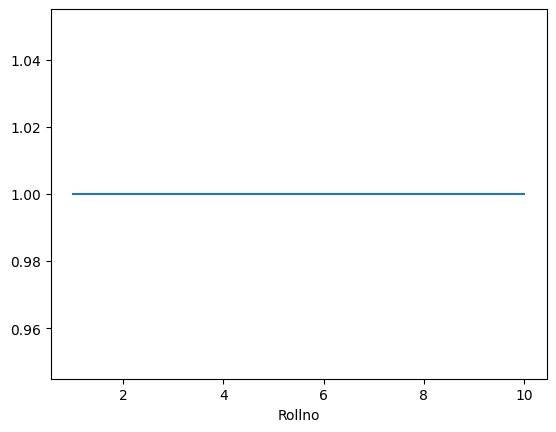

In [82]:
students_df.Rollno.value_counts().plot()

<Axes: xlabel='Course'>

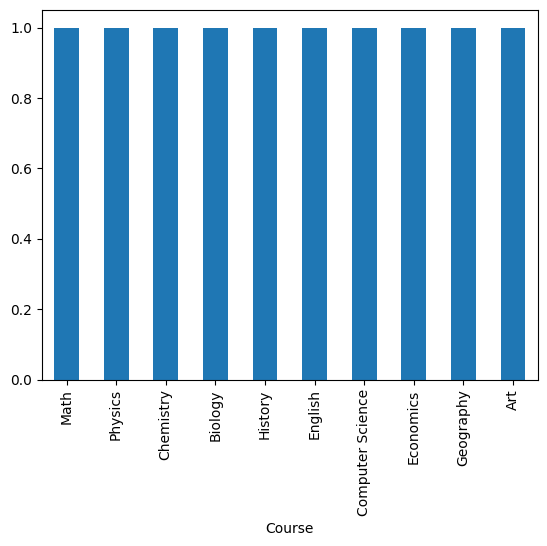

In [83]:
students_df.Course.value_counts().plot(kind="bar")

<Axes: ylabel='count'>

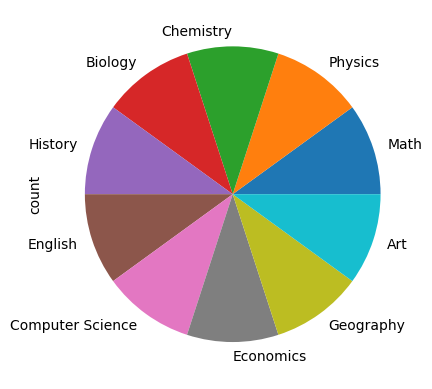

In [84]:
students_df.Course.value_counts().plot(kind='pie')

C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\3698283303.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['Course'])['Fee'].aggregate([min,max,np.mean]).plot(kind='bar')
C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\3698283303.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['Course'])['Fee'].aggregate([min,max,np.mean]).plot(kind='bar')
C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\3698283303.py:2: FutureWarning: The provided callable <function mean at 0x0000026677BA4AE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable

<Axes: xlabel='Course'>

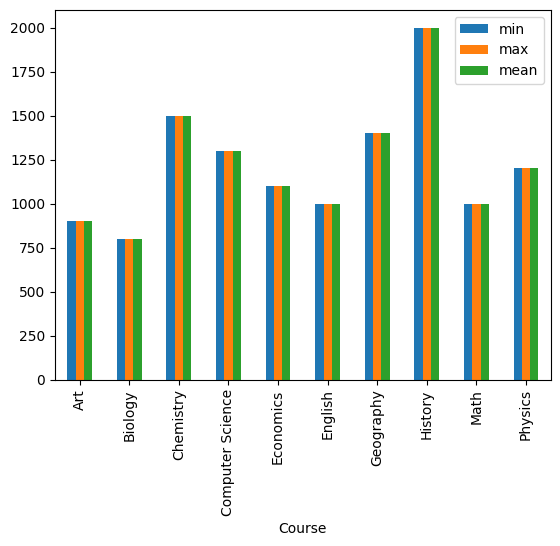

In [85]:
import numpy as np
students_df.groupby(['Course'])['Fee'].aggregate([min,max,np.mean]).plot(kind='bar')

# Data Wraggling
* .join
* .merge
* pd.concat([df1,df2,df3,df4,df5,df6])

## Joining
* left join
* right join 
* inner join
* outer join
* cross join

# Joining Columns Properties
* Same Pattern of both Columns 
* Same Data types of both Columns
* name can be different (Columns)

* Merge
    * On
    * left_on
    * right_on
    * left_index=true
    * right_index=true
    * How
        * left join
        * right join 
        * inner join
        * outer join
        * cross join

In [99]:
import pandas as pd
import numpy as np
from typing import Dict ,List,Union

# Create Students DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'StudentID': [1, 2, 3, 4, 5],
    'StudentName': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Biology', 'History']
}
students_df = pd.DataFrame(students_data)
display(students_df)
# Create Teachers DataFrame
teachers_data : Dict[str,List[Union[str,int]]] = {
    'Course ID': [102,101,201,202,301],
    'Course': ['Math', 'Physics', 'Chemistry', 'Biology', 'History'],
    'TeacherName': ['Mr. Smith', 'Dr. Johnson', 'Mrs. Davis', 'Prof. White', 'Ms. Robinson']
}
teachers_df = pd.DataFrame(teachers_data)
display(teachers_df)

# Create Student Fees DataFrame
fees_data : Dict[str,List[Union[str,int]]] = {
    'StudentID': [1, 2, 3, 4, 5],
    'FeeAmount': [1000, 1200, 1500, 800, 2000]
}
fees_df = pd.DataFrame(fees_data)
display(fees_df)
# Perform Joins
# Perform Joins

# Inner Join between Students, Teachers, and Student Fees on StudentID and Course
merged_inner = students_df.merge(teachers_df, on='Course', how='inner').merge(fees_df, on='StudentID', how='inner')
print("Inner Join between Students, Teachers, and Student Fees:")
display(merged_inner)

# Left Join between Students, Teachers, and Student Fees on StudentID and Course
merged_left = students_df.merge(teachers_df, on='Course', how='left').merge(fees_df, on='StudentID', how='left')
print("\nLeft Join between Students, Teachers, and Student Fees:")
display(merged_left)

# Right Join between Students, Teachers, and Student Fees on StudentID and Course
merged_right = students_df.merge(teachers_df, on='Course', how='right').merge(fees_df, on='StudentID', how='right')
print("\nRight Join between Students, Teachers, and Student Fees:")
display(merged_right)

# Outer Join between Students, Teachers, and Student Fees on StudentID and Course
merged_outer = students_df.merge(teachers_df, on='Course', how='outer').merge(fees_df, on='StudentID', how='outer')
print("\nOuter Join between Students, Teachers, and Student Fees:")
display(merged_outer)


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,FeeAmount
0,1,1000
1,2,1200
2,3,1500
3,4,800
4,5,2000


Inner Join between Students, Teachers, and Student Fees:


,StudentID,StudentName,Course,Course ID,TeacherName,FeeAmount
0,1,Alice,Math,102,Mr. Smith,1000
1,2,Bob,Physics,101,Dr. Johnson,1200
2,3,Charlie,Chemistry,201,Mrs. Davis,1500
3,4,David,Biology,202,Prof. White,800
4,5,Eva,History,301,Ms. Robinson,2000



Left Join between Students, Teachers, and Student Fees:


,StudentID,StudentName,Course,Course ID,TeacherName,FeeAmount
0,1,Alice,Math,102,Mr. Smith,1000
1,2,Bob,Physics,101,Dr. Johnson,1200
2,3,Charlie,Chemistry,201,Mrs. Davis,1500
3,4,David,Biology,202,Prof. White,800
4,5,Eva,History,301,Ms. Robinson,2000



Right Join between Students, Teachers, and Student Fees:


,StudentID,StudentName,Course,Course ID,TeacherName,FeeAmount
0,1,Alice,Math,102,Mr. Smith,1000
1,2,Bob,Physics,101,Dr. Johnson,1200
2,3,Charlie,Chemistry,201,Mrs. Davis,1500
3,4,David,Biology,202,Prof. White,800
4,5,Eva,History,301,Ms. Robinson,2000



Outer Join between Students, Teachers, and Student Fees:


,StudentID,StudentName,Course,Course ID,TeacherName,FeeAmount
0,1,Alice,Math,102,Mr. Smith,1000
1,2,Bob,Physics,101,Dr. Johnson,1200
2,3,Charlie,Chemistry,201,Mrs. Davis,1500
3,4,David,Biology,202,Prof. White,800
4,5,Eva,History,301,Ms. Robinson,2000


In [87]:
students_df

,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


In [88]:
students_df.info()
teachers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    5 non-null      int64 
 1   StudentName  5 non-null      object
 2   Course       5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course ID    5 non-null      int64 
 1   Course       5 non-null      object
 2   TeacherName  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [89]:
display(teachers_df)
display(students_df)

,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


In [90]:
display(teachers_df)
display(students_df)
print("Result")
df1 : pd.DataFrame = pd.merge(students_df,teachers_df)
df1

,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


Result


,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [91]:
df1 : pd.DataFrame = pd.merge(students_df,teachers_df,on='Course')
df1

,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [92]:
df2 : pd.DataFrame = pd.merge(students_df,fees_df)
df2

,StudentID,StudentName,Course,FeeAmount
0,1,Alice,Math,1000
1,2,Bob,Physics,1200
2,3,Charlie,Chemistry,1500
3,4,David,Biology,800
4,5,Eva,History,2000


In [93]:
display(teachers_df)
display(students_df)
print("Result")
df1 : pd.DataFrame = pd.merge(students_df,teachers_df,on=['Course'],how='left')
df1

,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


Result


,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [94]:
display(teachers_df)
display(students_df)
print("Result")
df1 : pd.DataFrame = pd.merge(students_df,teachers_df,on=['Course'],how='right')
df1

,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


Result


,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [95]:
display(teachers_df)
display(students_df)
print("Result")
df1 : pd.DataFrame = pd.merge(students_df,teachers_df,on=['Course'],how='outer')
df1

,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


Result


,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [96]:
display(teachers_df)
display(students_df)
print("Result")
df1 : pd.DataFrame = pd.merge(students_df,teachers_df,on=['Course'],how='inner')
df1

,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


Result


,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [97]:
display(teachers_df)
display(students_df)
print("Result")
df1 : pd.DataFrame = pd.merge(students_df,teachers_df,on=['Course'],how='left')
display(df1)


,Course ID,Course,TeacherName
0,102,Math,Mr. Smith
1,101,Physics,Dr. Johnson
2,201,Chemistry,Mrs. Davis
3,202,Biology,Prof. White
4,301,History,Ms. Robinson


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History


Result


,StudentID,StudentName,Course,Course ID,TeacherName
0,1,Alice,Math,102,Mr. Smith
1,2,Bob,Physics,101,Dr. Johnson
2,3,Charlie,Chemistry,201,Mrs. Davis
3,4,David,Biology,202,Prof. White
4,5,Eva,History,301,Ms. Robinson


In [102]:
fee_df

,Date,Amount
0,2023-01-27,3641
1,2023-05-18,1837
2,2023-02-14,4984
3,2023-07-28,1374
4,2023-05-17,2987
...,...,...
9995,2023-07-05,1244
9996,2023-12-26,3758
9997,2023-12-19,4049
9998,2023-10-04,1661


In [104]:
fee_df.groupby(['Date'])['Amount'].aggregate([len, sum, min, mean, sd])

C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\382329896.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fee_df.groupby(['Date'])['Amount'].aggregate([len, sum, min, mean, sd])
C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\382329896.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  fee_df.groupby(['Date'])['Amount'].aggregate([len, sum, min, mean, sd])
C:\Users\azfar\AppData\Local\Temp\ipykernel_3164\382329896.py:1: FutureWarning: The provided callable <function mean at 0x0000026677BA4AE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To ke

,len,sum,min,mean,std
Date,,,,,
2023-01-01,22,66681,1024,3030.954545,1211.634806
2023-01-02,39,113220,1397,2903.076923,1062.334182
2023-01-03,31,90412,1028,2916.516129,1221.616903
2023-01-04,33,102947,1039,3119.606061,1235.245293
2023-01-05,23,67380,1002,2929.565217,1332.986593
...,...,...,...,...,...
2023-12-27,26,76000,1182,2923.076923,1168.712862
2023-12-28,29,81285,1090,2802.931034,1122.554005
2023-12-29,29,91700,1048,3162.068966,1325.214347


In [105]:
import pandas as pd
from IPython.display import display

# Create Students DataFrame
students_data = {
    'StudentID': [1, 2, 3, 4, 5],
    'StudentName': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Biology', 'History']
}
students_df = pd.DataFrame(students_data)

# Create Student Fees DataFrame
fees_data = {
    'StudentID': [1, 2, 3, 4, 5],
    'FeeAmount': [1000, 1200, 1500, 800, 2000]
}
fees_df = pd.DataFrame(fees_data)

# Display the original DataFrames
print("Students DataFrame:")
display(students_df)

print("\nStudent Fees DataFrame:")
display(fees_df)

# Merge Students and Fees DataFrames on StudentID
merged_students_fees = students_df.merge(fees_df, on='StudentID', how='inner')
print("\nMerged DataFrame for Students and Fees:")
display(merged_students_fees)


Students DataFrame:


,StudentID,StudentName,Course
0,1,Alice,Math
1,2,Bob,Physics
2,3,Charlie,Chemistry
3,4,David,Biology
4,5,Eva,History



Student Fees DataFrame:


,StudentID,FeeAmount
0,1,1000
1,2,1200
2,3,1500
3,4,800
4,5,2000



Merged DataFrame for Students and Fees:


,StudentID,StudentName,Course,FeeAmount
0,1,Alice,Math,1000
1,2,Bob,Physics,1200
2,3,Charlie,Chemistry,1500
3,4,David,Biology,800
4,5,Eva,History,2000


In [109]:
pd.concat([students_df,fees_df], axis=1)

,StudentID,StudentName,Course,StudentID,FeeAmount
0,1,Alice,Math,1,1000
1,2,Bob,Physics,2,1200
2,3,Charlie,Chemistry,3,1500
3,4,David,Biology,4,800
4,5,Eva,History,5,2000


: 

In [108]:
from typing import List

list
List

xyz


In [ ]:
from typing import Dict

dict
Dict

In [ ]:
from typing import Iterator
from collections.abc import Iterator